In [49]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

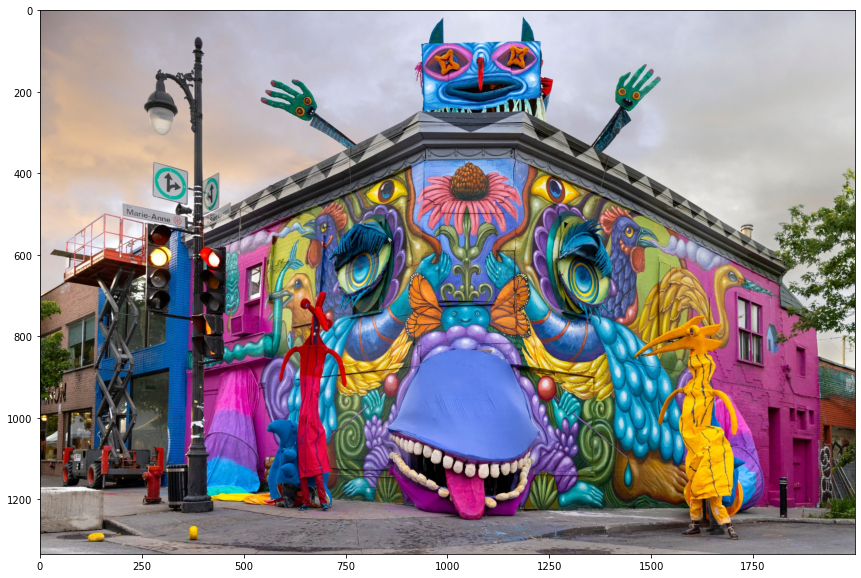

In [50]:
# Load image
img = cv2.imread('../Data/brissonnet.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [51]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [55]:
# Cast the image to float
img = np.float32(img)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

from scipy.spatial import distance

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        
        #for ch in pixel:
        #    distances = distance.euclidean(pixel, color)
        #    best_color_inx = np.where(distances == distances.min())
        
        distances = np.array([0, 0, 0, 0])
        for idx, color in enumerate(colors):
            distances[idx] = distance.euclidean(pixel, color)
        best_color_inx = np.where(distances == distances.min())
        new_pixel = colors[best_color_inx][0]
        # Apply quantization
        quantized[r, c, :] = new_pixel

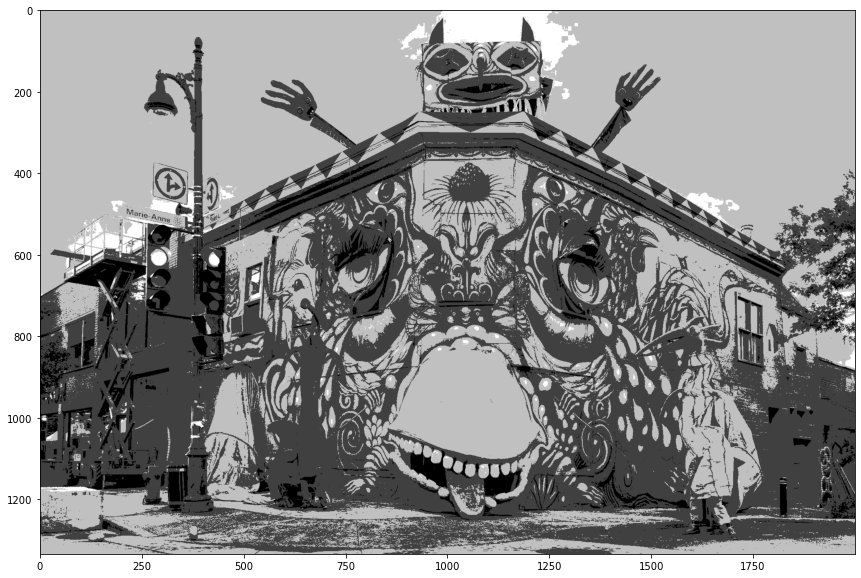

In [56]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(np.uint8(quantized))

In [57]:
# Compute average quantization error
def psnr(ref, target):
    error = ref.astype(np.float32) - target.astype(np.float32)
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)
avg_quant_error = psnr(img, quantized)
print('Average quantization error as PSNR:', avg_quant_error, 'dB')

Average quantization error as PSNR: 14.783438107461663 dB
